41088 Repeated 
a and b that minimize the loss function obtained by the gradient method are
8.477403460299513
145.09863070323775
Final mean square error
344.72719664673


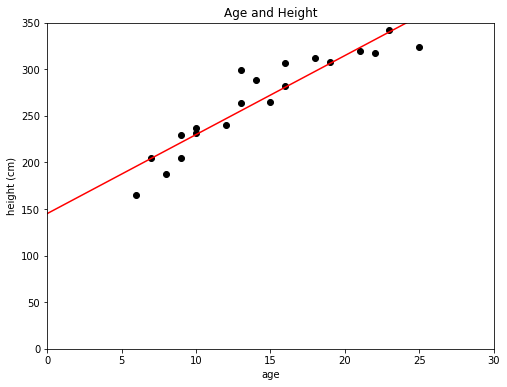

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# UMA's age and height
age = np.array([6,8,9,7,9,10,10,12,13,15,16,14,13,16,19,18,22,21,25,23])
Height = np.array([164.61,187.25,204.30,204.88,229.48,231.99,236.59,240.36,263.98,264.79,281.85,288.38,298.75,306.34,307.48,312.44,317.72,319.41,323.96,341.96])

# The loss function which wanted to minimize is defined as the mean square error
# Parameter vector [0] is a at y = ax + b, parameter vector [1] is b
def loss_function(parameter_vector): 
    parametera = parameter_vector[0]
    parameterb = parameter_vector[1]    
    # Square the error  and return mean with np.mean
    # Note that age and height are arrays
    return np.mean((parametera * age + parameterb - Height)**2) 

def like_partial_derivative(func, current_location_vector): # Regarding all variables, Make the result of partial differentiation into a slope vector    
    slope_vector = np.empty_like(current_location_vector) # Create empty slope vector
    for i in range(len(current_location_vector)):
        # Execute  "help_like_partial_derivative" at the i-th variable
        slope_vector[i] = help_like_partial_derivative(func, current_location_vector, i)
    
    return slope_vector # Return the fixed slope vector

def help_like_partial_derivative(func, current_location_vector, i):
    small_width = 0.0001    
    difference_calculation_vector = np.zeros_like(current_location_vector) # First  fill zero
    difference_calculation_vector[i] = small_width     # Set a small width only to the i-th target for difference calculation
    # Subtract and divide using a small width, find the slope and return
    return (func(current_location_vector+difference_calculation_vector) - func(current_location_vector-difference_calculation_vector)) / (2*small_width)

def gradient_method(func, start_location_vector, learning_rate=0.001, max_number_of_repetitions=100000):
    current_location_vector = start_location_vector
    convergence_condition_slope = 0.001
    
    for i in range(max_number_of_repetitions): # Repeat until convergence
        # Find the slope (vector) at the current location
        slope_vector = like_partial_derivative(func, current_location_vector) 
        # Change current location based on slope
        current_location_vector = current_location_vector - learning_rate * slope_vector
        # The loop ends if both of the convergence conditions fall below the slope. 
        # However, when i is 0, the loop does not end because the slope vector is [0,0]
        if abs(slope_vector[0]) < convergence_condition_slope and abs(slope_vector[1]) < convergence_condition_slope and i > 0:        
            break

    # Return the final location
    print(str(i)+" Repeated ")    
    return current_location_vector

# Find minimum value of function by gradient method (initial value is 5,5)
minimum_value = gradient_method(loss_function, [5, 5])
print("a and b that minimize the loss function obtained by the gradient method are")
print(minimum_value[0])
print(minimum_value[1])
print("Final mean square error")
print(loss_function(minimum_value))

###Scatter plot and regression line
plt.figure(figsize = (8, 6))
plt.title("Age and Height")
plt.xlim([0, 30])
plt.ylim([0, 350])
plt.xlabel("age")
plt.ylabel("height (cm)")
plt.scatter(age,Height,color="k") # Scatter plot
# Layer straight line
###
x2 = np.linspace(0,30,10) # Array at equal intervals in the X-axis direction
y2 = minimum_value[0]*x2+minimum_value[1]  # Array the values in the Y-axis direction (ax + b value)
plt.plot(x2,y2,color="r")
plt.show()